In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
def gen_sequence(start=0, length =80, p=0.95):
    sequence = np.zeros(length)
    sequence[0] = start
    for i in range(1, length):
        random_num = np.random.rand()
        if random_num > p:
            # Switch state
            sequence[i] = 1-sequence[i-1]
        else:
            sequence[i] = sequence[i-1]
    return sequence

In [27]:
np.random.seed(0)
source_1_range = [100, 200]
source_2_range = [1000, 1300]

sequence_length = 48
num_sequences = 1000

seq1 = []
seq2 = []
combined = []

np.random.seed(0)
for seq in range(num_sequences):
    if seq % (num_sequences/10)==0:
        print(seq)
    source_1_power_val = np.random.choice(list(range(*source_1_range)))
    source_2_power_val = np.random.choice(list(range(*source_2_range)))
    
    source_1_seq = source_1_power_val*gen_sequence(start=np.random.choice([0, 1]), length =sequence_length, p=0.95)
    source_2_seq = source_2_power_val*gen_sequence(start=np.random.choice([0, 1]), length =sequence_length, p=0.95)
    combined_seq = source_1_seq + source_2_seq
    seq1.append(source_1_seq)
    seq2.append(source_2_seq)
    combined.append(combined_seq)

combined = np.array(combined)
seq1 = np.array(seq1)
seq2 = np.array(seq2)

#seq1 = seq1.reshape(num_sequences, sequence_length, 1)
#seq2 = seq2.reshape(num_sequences, sequence_length, 1)
#combined = combined.reshape(num_sequences, sequence_length, 1)

0
100
200
300
400
500
600
700
800
900


In [28]:
combined.shape, seq1.shape

((1000, 48), (1000, 48))

In [21]:
seq1 = seq1.reshape(num_sequences, sequence_length, 1)

In [22]:
from keras.layers import Conv1D, Dense, Flatten, MaxPool1D, InputLayer, Activation, Dropout, MaxPooling1D
from keras.models import Sequential


In [23]:
model = Sequential()

model.add(InputLayer(input_shape=(sequence_length,)))


model.add(Dense(sequence_length, activation='relu'))
model.add(Dense(sequence_length, activation='relu'))


model.add(Dropout(rate=0.1))


model.summary()
model.compile('adam','mean_absolute_error')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_4 (Dense)              (None, 48)                2352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 48)                0         
Total params: 4,704
Trainable params: 4,704
Non-trainable params: 0
_________________________________________________________________


In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

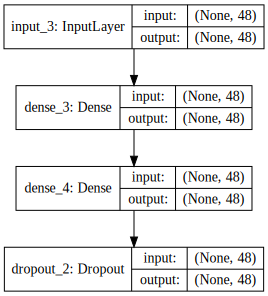

In [25]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [31]:
model.fit(combined[:800], seq1[:800], epochs=1500, validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/1500
720/720 [==============================] - 0s 58us/step - loss: 34.1550 - val_loss: 67.6305
Epoch 2/1500
720/720 [==============================] - 0s 47us/step - loss: 34.3309 - val_loss: 68.2056
Epoch 3/1500
720/720 [==============================] - 0s 52us/step - loss: 34.0228 - val_loss: 69.4131
Epoch 4/1500
720/720 [==============================] - 0s 87us/step - loss: 33.3299 - val_loss: 69.3883
Epoch 5/1500
720/720 [==============================] - 0s 78us/step - loss: 33.5856 - val_loss: 68.6971
Epoch 6/1500
720/720 [==============================] - 0s 87us/step - loss: 33.8712 - val_loss: 68.6377
Epoch 7/1500
720/720 [==============================] - 0s 66us/step - loss: 34.3130 - val_loss: 70.1241
Epoch 8/1500
720/720 [==============================] - 0s 71us/step - loss: 33.9830 - val_loss: 68.4149
Epoch 9/1500
720/720 [==============================] - 0s 65us/step - loss: 33.2324 - val_loss: 68.9505
Epoch 10/1

720/720 [==============================] - 0s 74us/step - loss: 33.6223 - val_loss: 71.9646
Epoch 154/1500
720/720 [==============================] - 0s 66us/step - loss: 33.9002 - val_loss: 69.0097
Epoch 155/1500
720/720 [==============================] - 0s 59us/step - loss: 33.7809 - val_loss: 70.8974
Epoch 156/1500
720/720 [==============================] - 0s 68us/step - loss: 33.5878 - val_loss: 70.1629
Epoch 157/1500
720/720 [==============================] - 0s 81us/step - loss: 33.4841 - val_loss: 70.4948
Epoch 158/1500
720/720 [==============================] - 0s 70us/step - loss: 33.1002 - val_loss: 70.3129
Epoch 159/1500
720/720 [==============================] - 0s 61us/step - loss: 33.6371 - val_loss: 71.8551
Epoch 160/1500
720/720 [==============================] - 0s 56us/step - loss: 33.5226 - val_loss: 69.7989
Epoch 161/1500
720/720 [==============================] - 0s 67us/step - loss: 32.9675 - val_loss: 70.4248
Epoch 162/1500
720/720 [============================

720/720 [==============================] - 0s 58us/step - loss: 34.3991 - val_loss: 71.9235
Epoch 306/1500
720/720 [==============================] - 0s 50us/step - loss: 33.0165 - val_loss: 70.4827
Epoch 307/1500
720/720 [==============================] - 0s 51us/step - loss: 33.0750 - val_loss: 71.8164
Epoch 308/1500
720/720 [==============================] - 0s 47us/step - loss: 33.5007 - val_loss: 70.3046
Epoch 309/1500
720/720 [==============================] - 0s 54us/step - loss: 32.8159 - val_loss: 71.4879
Epoch 310/1500
720/720 [==============================] - 0s 51us/step - loss: 32.9981 - val_loss: 71.0654
Epoch 311/1500
720/720 [==============================] - 0s 47us/step - loss: 32.9308 - val_loss: 70.7069
Epoch 312/1500
720/720 [==============================] - 0s 74us/step - loss: 33.1550 - val_loss: 71.6379
Epoch 313/1500
720/720 [==============================] - 0s 106us/step - loss: 33.3923 - val_loss: 70.2671
Epoch 314/1500
720/720 [===========================

KeyboardInterrupt: 

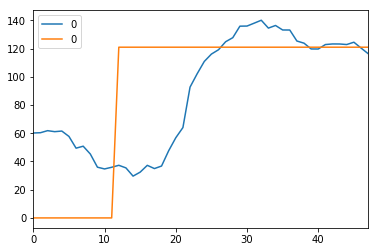

In [42]:
start = 901
ax = pd.DataFrame(model.predict(combined[start:start+1])).T.plot(legend='Pred')
pd.DataFrame(seq1[start:start+1]).T.plot(ax=ax, legend='GT')
plt.legend()

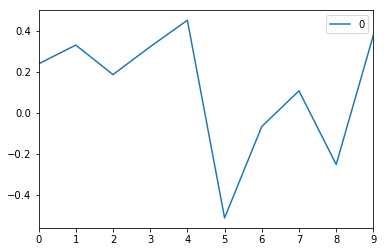

In [242]:
pd.DataFrame(model.get_weights()[0].reshape(10, 1)).plot()